In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
import statsmodels.api as sm

%matplotlib inline

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv') 

In [3]:
train.shape

(2051, 81)

In [4]:
test.shape

(878, 80)

In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Exploratory analysis

In [6]:
train.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


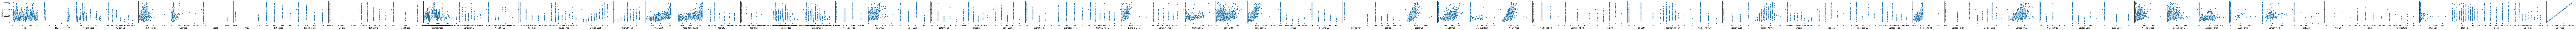

In [7]:
sns.pairplot(train, x_vars= train.columns, y_vars=['SalePrice']);
#with the below plots we can see outliers easily so will look into those

We note that there are many outliers. We will only investigate ones that their variable might go into the model.
- two outliers in lot area and lot frontage
- one outlier for garage cars

In [8]:
train['Lot Area'].sort_values(ascending =False)

471     159000
694     115149
1854     70761
960      63887
745      57200
         ...  
1447      1484
787       1477
53        1476
1544      1470
1510      1300
Name: Lot Area, Length: 2051, dtype: int64

In [9]:
train.loc[471,['Lot Area','Garage Cars','SalePrice']] #should remove this bc it doesn't make sense

Lot Area       159000
Garage Cars         2
SalePrice      277000
Name: 471, dtype: object

In [10]:
train.loc[694,['Lot Area','Garage Cars','SalePrice']] #should remove this bc it doesn't make sense

Lot Area       115149
Garage Cars         2
SalePrice      302000
Name: 694, dtype: object

In [11]:
train['Lot Frontage'].sort_values(ascending =False) #interesting that two highest lot frontage is the same

960     313.0
1335    313.0
1875    200.0
441     195.0
1263    174.0
        ...  
2016      NaN
2022      NaN
2028      NaN
2031      NaN
2047      NaN
Name: Lot Frontage, Length: 2051, dtype: float64

In [12]:
train.loc[960,['Lot Frontage','Garage Cars','SalePrice']] #should remove this bc it doesn't make sense

Lot Frontage       313
Garage Cars          2
SalePrice       160000
Name: 960, dtype: object

In [13]:
train.loc[1335,['Lot Frontage','Garage Cars','SalePrice']] #should remove this bc it doesn't make sense

Lot Frontage       313
Garage Cars          2
SalePrice       242000
Name: 1335, dtype: object

In [14]:
train['Garage Cars'].sort_values(ascending =False)

925     5.0
337     4.0
332     4.0
289     4.0
1875    4.0
       ... 
356     0.0
1754    0.0
951     0.0
579     0.0
1712    NaN
Name: Garage Cars, Length: 2051, dtype: float64

In [15]:
train.loc[925,['Lot Area','Garage Cars','SalePrice']] #should remove this bc it doesn't make sense

Lot Area         8635
Garage Cars         5
SalePrice      126500
Name: 925, dtype: object

In [16]:
train = train.drop([471,694,925, 960, 1335]) #dropped the outliers bc exploratory analysis
#train = train.drop([1592,1164,1964, 1136, 1796, 1692]) #dropped these outliers bc of normality of errors

After dropping the observations that I have deemed are outliers, I will look at the correlation heat map to determine which variables I might want to keep. I've decided to specifically take note of the variables with correlation higher than 0.5

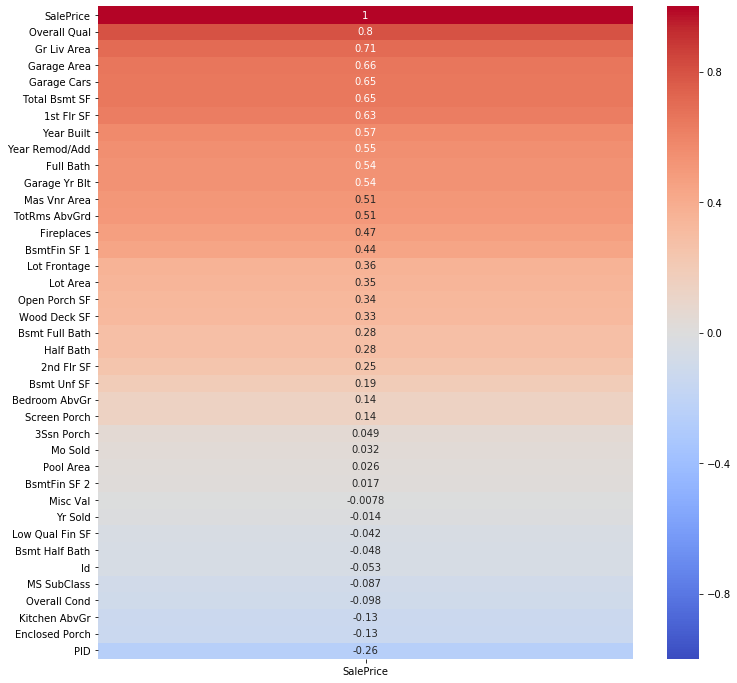

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

In [18]:
#creating a dataframe using variables that's higher than 0.5 correlation as a starter point
#I'm also going to keep Lot Frontage bc I think this should be in the model and also create a pool dummy
train["Have Pool"] = train["Pool Area"].map(lambda x: 0 if x==0 else 1)
corr_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool','SalePrice']

In [19]:
corr_df = train[corr_features]

In [20]:
corr_df.corr()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Garage Yr Blt,Lot Frontage,Mas Vnr Area,TotRms AbvGrd,Have Pool,SalePrice
Overall Qual,1.000000,0.566193,0.564396,0.592367,0.552719,0.475325,0.602799,0.584222,0.514763,0.574946,0.187292,0.436340,0.379136,-0.010334,0.802341
Gr Liv Area,0.566193,1.000000,0.486828,0.497799,0.429098,0.545498,0.258737,0.321922,0.624305,0.288143,0.356059,0.378820,0.815659,0.071490,0.709704
Garage Area,0.564396,0.486828,1.000000,0.896536,0.483407,0.493476,0.491368,0.402596,0.401383,0.554851,0.359628,0.381781,0.339563,0.022570,0.657100
Garage Cars,0.592367,0.497799,0.896536,1.000000,0.447489,0.449185,0.548679,0.447285,0.471700,0.583259,0.317802,0.365081,0.372475,0.018542,0.652858
Total Bsmt SF,0.552719,0.429098,0.483407,0.447489,1.000000,0.802411,0.417569,0.312524,0.331947,0.354161,0.328489,0.399610,0.285656,-0.019526,0.651083
1st Flr SF,0.475325,0.545498,0.493476,0.449185,0.802411,1.000000,0.325911,0.242481,0.370744,0.266461,0.434768,0.383041,0.386409,0.093935,0.631484
Year Built,0.602799,0.258737,0.491368,0.548679,0.417569,0.325911,1.000000,0.629374,0.480149,0.825867,0.111240,0.329515,0.136091,-0.003326,0.573187
Year Remod/Add,0.584222,0.321922,0.402596,0.447285,0.312524,0.242481,0.629374,1.000000,0.470371,0.676103,0.076309,0.208896,0.200204,-0.032531,0.549909
Full Bath,0.514763,0.624305,0.401383,0.471700,0.331947,0.370744,0.480149,0.470371,1.000000,0.503900,0.152861,0.238622,0.520043,0.005505,0.537503
Garage Yr Blt,0.574946,0.288143,0.554851,0.583259,0.354161,0.266461,0.825867,0.676103,0.503900,1.000000,0.070238,0.266983,0.186361,-0.021765,0.536166


We note that Garage Area and Garage Car seem to be highly correlated so will take out Garage Car. Also Year Built and Garage Year Built are highly correlated so we will keep Year built.

In [21]:
train_1_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool','SalePrice']
train_1 = train[train_1_features]

In [22]:
#make X and y for cv and making the model
X1 = train_1.drop('SalePrice', axis =1)
X1 = X1.fillna(X1.mean()) #for modeling to work have to fill in missing values
y1=train_1['SalePrice']

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state =42)

In [24]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(array([  6.,  49., 181., 207.,  52.,  11.,   3.,   0.,   2.,   1.]),
 array([-100865.56473623,  -69425.66369052,  -37985.76264482,
          -6545.86159912,   24894.03944658,   56333.94049228,
          87773.84153798,  119213.74258368,  150653.64362938,
         182093.54467509,  213533.44572079]),
 <a list of 10 Patch objects>)

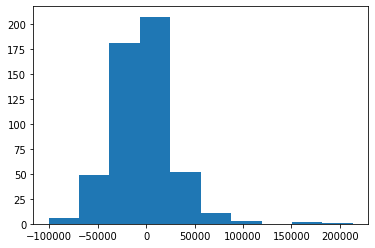

In [25]:
resids1 = y1_test - model1.predict(X1_test)
plt.hist(resids1)

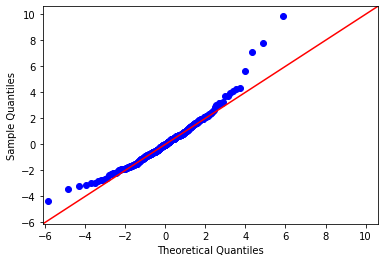

In [26]:
sm.qqplot(resids1 ,stats.t, fit =True , line = '45');

I believe my qq plots and residual distribution was being thrown off because the distribution is skewed. 

In [27]:
#training R^2 score
model1.score(X1_train,y1_train)

0.8142146761020975

In [28]:
#testing R^2 score
model1.score(X1_test, y1_test)

0.844134354162552

In [29]:
#cv score
cross_val_score(model1, X1_train, y1_train, cv =5).mean()

0.8017960710710949

I believe that this is telling us that our model underfits and we got lucky on the testing set. However, in general these R^2 scores aren't too bad. 

In [30]:
#to make predictions, the test set has to match the train
test["Have Pool"] = test["Pool Area"].map(lambda x: 0 if x==0 else 1)

#has to match train_1_features
test_1_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'] 
test_1 = test[test_1_features]
test_1 = test_1.fillna(test_1.mean())

In [31]:
preds1 = model1.predict(test_1)

In [32]:
#outputting to csv
real_output1 = pd.DataFrame( {'Id':test['Id']})
real_output1['SalePrice'] = preds1
real_output1.to_csv('real_submission.csv', index = False)

### Going to look more carefully into the variables of our model -- distributions

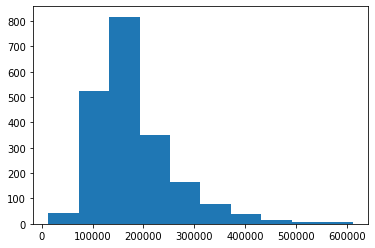

In [33]:
plt.hist(y1);

(array([  2.,   0.,   6.,  13.,  81., 439., 834., 460., 176.,  35.]),
 array([ 9.45634071,  9.84309933, 10.22985795, 10.61661658, 11.0033752 ,
        11.39013383, 11.77689245, 12.16365107, 12.5504097 , 12.93716832,
        13.32392695]),
 <a list of 10 Patch objects>)

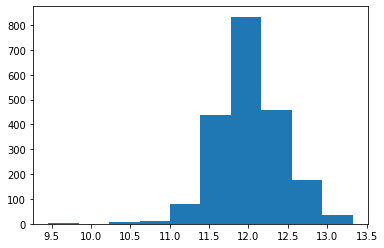

In [34]:
#the target response is skewed so we will simply try a log transform
y2 = np.log(y1)
plt.hist(y2)

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y2, random_state =42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#train score
display(model2.score(X2_train,y2_train))
#test score
display(model2.score(X2_test,y2_test))
#cv score
cross_val_score(model2, X2_train, y2_train, cv =5).mean()

0.8334409982825146

0.8708266048700957

0.8256596305342357

These scores are slightly better but it still seems that our model is underfitting

(array([  1.,   1.,   2.,  10.,   7.,  56., 168., 193.,  56.,  18.]),
 array([-0.86686525, -0.74404119, -0.62121712, -0.49839306, -0.37556899,
        -0.25274493, -0.12992086, -0.00709679,  0.11572727,  0.23855134,
         0.3613754 ]),
 <a list of 10 Patch objects>)

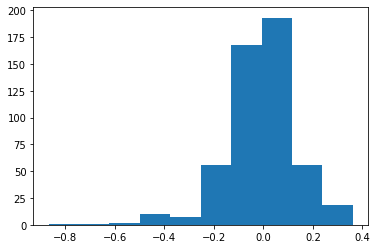

In [37]:
resids2 = y2_test - model2.predict(X2_test)
plt.hist(resids2)

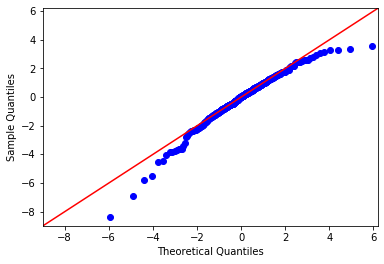

In [38]:
sm.qqplot(resids2 ,stats.t, fit =True , line = '45');

This residual plot doesn't really look better. However, because of the clear skew in the distribution of the SalePrice, I'll keep the target variable logged.

In [39]:
preds2 = np.exp(model2.predict(test_1)) #we will keep the log transform for all future models

In [40]:
#output to csv
real_output2 = pd.DataFrame( {'Id':test['Id']})
real_output2['SalePrice'] = preds2
real_output2.to_csv('real_submission2.csv', index = False)

### Looking at distributions of variables

In [41]:
def subplot_distribution(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        #ax[i].set_xlabel(list_of_xlabels[i])
        

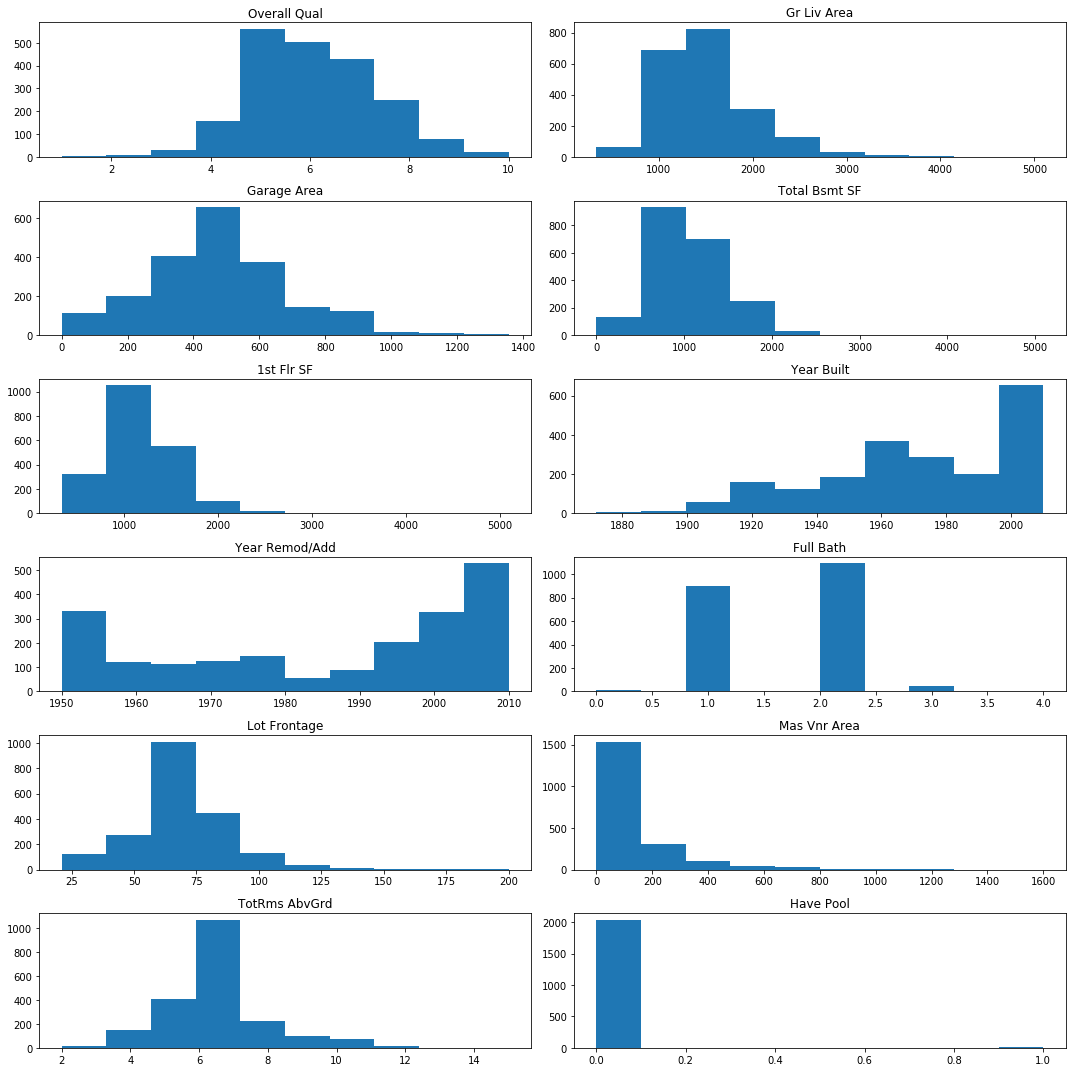

In [42]:
subplot_distribution(X1, 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'], 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'],
                   [])
plt.tight_layout();

### Looking at Relationships of variables with target

In [43]:
def subplot_relationship(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column], dataframe['SalePrice']) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('SalePrice')

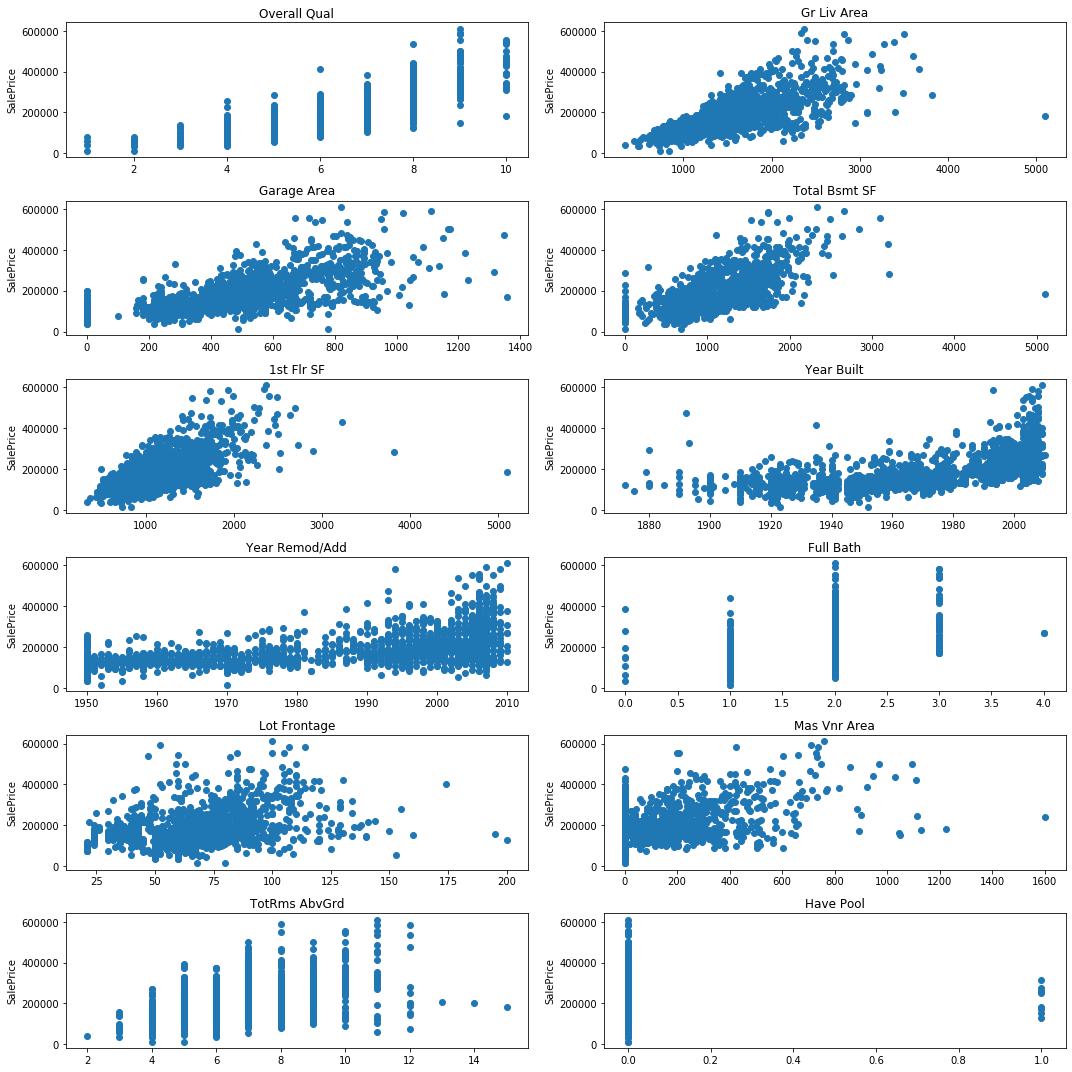

In [44]:
subplot_relationship(train_1, 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'], 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'],
                   [])
plt.tight_layout();

In [45]:
#The variables don't seem great for a linear fit but we won't try to transform them yet. 

## Adding a couple intuitive categorical variables (Neighborhood, Utilities, Bldg Type, Exter Qual, Heating, Central Air, Kitchen Qual, Functional, Garage Qual)

In [46]:
train_3_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool', 'Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual', 'SalePrice']
train_3 = train[train_3_features]
train[train_3.columns[1:]].corr()['SalePrice'][:]

Gr Liv Area       0.709704
Garage Area       0.657100
Total Bsmt SF     0.651083
1st Flr SF        0.631484
Year Built        0.573187
Year Remod/Add    0.549909
Full Bath         0.537503
Lot Frontage      0.362646
Mas Vnr Area      0.513970
TotRms AbvGrd     0.506771
Have Pool         0.028068
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [47]:
train_3 = pd.get_dummies(train_3, columns =['Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual'], drop_first=True)
train_3.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Lot Frontage,Mas Vnr Area,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,6,1479,475.0,725.0,725,1976,2005,2,NaN,289.0,...,0,0,0,0,0,1,0,0,0,1
1,7,2122,559.0,913.0,913,1996,1997,2,43.0,132.0,...,0,0,0,0,0,1,0,0,0,1
2,5,1057,246.0,1057.0,1057,1953,2007,1,68.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,5,1444,400.0,384.0,744,2006,2007,2,73.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,6,1445,484.0,676.0,831,1900,1993,2,82.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [48]:
X3 = train_3.drop('SalePrice', axis =1)
X3 = X3.fillna(X3.mean()) #for modeling to work have to fill in missing values
y3=np.log(train_3['SalePrice'])

In [49]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state =42)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#train score
display(model3.score(X3_train,y3_train))
#test score
display(model3.score(X3_test,y3_test))
#cv score
cross_val_score(model3, X3_train, y3_train, cv =5).mean()

0.8869880360337391

0.8867809825426881

0.8655960158151753

We note that these R^2 scores and cross val score are a lot better.

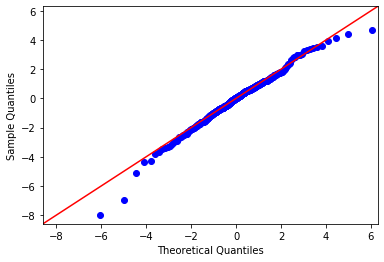

In [51]:
resids3 = y3_test - model3.predict(X3_test)
sm.qqplot(resids3 ,stats.t, fit =True , line = '45');

We still see outliers in this qq plot. 

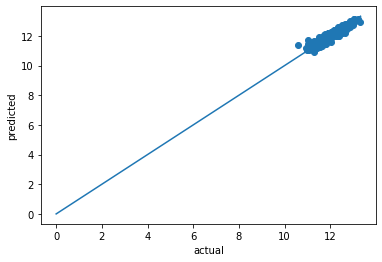

In [52]:
plt.scatter(y3_test, model3.predict(X3_test))
plt.xlabel('actual'); plt.ylabel('predicted')
plt.plot((0,max(y3_train)), (0, max(y3_train) )) # the diagonal line

In [53]:
test["Have Pool"] = test["Pool Area"].map(lambda x: 0 if x==0 else 1)

test_3_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool', 'Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual']
test_3 = test[test_3_features]
test_3 = pd.get_dummies(test_3, columns =['Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual'], drop_first=True)
test_3 = test_3.fillna(test_3.mean())

We note that sometimes, the training set may have more columns than the test set because of dummying. ie if A neighborhood exists in the train but not test, the train will have one more column than the test.

In [54]:
# Get missing columns in the training test
missing_cols = set( X3_train.columns ) - set( test_3.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_3[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_3 = test_3[X3_train.columns]

In [55]:
preds3 = np.exp(model3.predict(test_3))

In [56]:
#output to csv
real_output3 = pd.DataFrame( {'Id':test['Id']})
real_output3['SalePrice'] = preds3
real_output3.to_csv('real_submission3.csv', index = False)

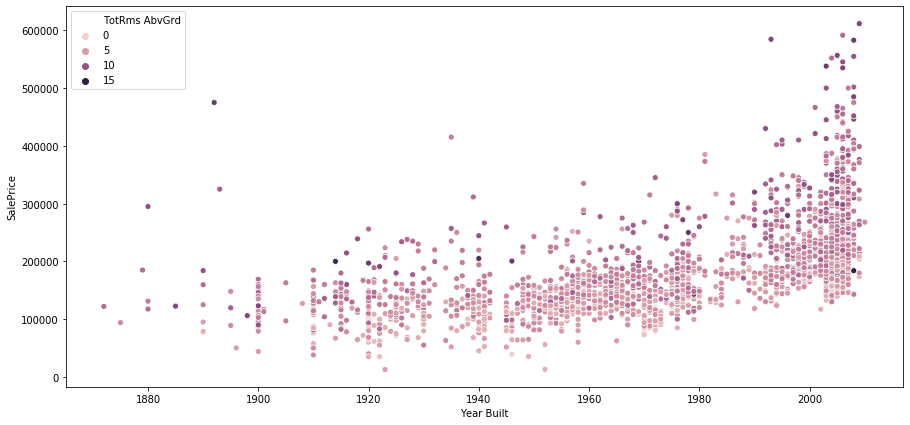

In [57]:
plt.figure(figsize = (15,7))
sns.scatterplot(x="Year Built", y="SalePrice", hue="TotRms AbvGrd",data=train);

In [58]:
train['TotRms AbvGrd'].unique()

array([ 6,  8,  5,  7,  9,  4, 12, 11, 10,  3, 14,  2, 13, 15])